Case Study Seven: 

By: Allen Hoskins & Brittany Lewandowski

In [1]:
#Importing in required libraries:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Converting our final_project csv to a data frame and decoding it using a method of utf-8:
df = pd.read_pickle(r'/Users/allen/Desktop/MSDS/QTW/large datasets/cs7/data_sets/cs7.pkl.gzip',compression='gzip')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [5]:
def parseFloat(str):
    try:
        return float(str)
    except:
        str = str.strip()
        if str.endswith("%"):
            return float(str.strip("%").strip()) / 100
        raise Exception("Don't know how to parse %s" % str)

df['x32'] = df['x32'].apply(parseFloat)

In [6]:
df['x37'] = df['x37'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [7]:
print(f'Column X24 Unique values:\n {df.x24.unique()}\n')
print(f'Column X29 Unique values:\n {df.x29.unique()}\n')
print(f'Column X30 Unique values:\n {df.x30.unique()}')

Column X24 Unique values:
 ['euorpe' 'asia' 'america' nan]

Column X29 Unique values:
 ['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' nan 'Mar' 'Feb' 'Dev'
 'January']

Column X30 Unique values:
 ['tuesday' 'wednesday' 'thurday' 'monday' 'friday' nan]


In [8]:
for col in ['x24', 'x29','x30']:
    df[col] = df[col].replace(np.nan, 'Unknown', regex=True)

In [9]:
print(f'Column X24 Unique values:\n {df.x24.unique()}\n')
print(f'Column X29 Unique values:\n {df.x29.unique()}\n')
print(f'Column X30 Unique values:\n {df.x30.unique()}')

Column X24 Unique values:
 ['euorpe' 'asia' 'america' 'Unknown']

Column X29 Unique values:
 ['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' 'Unknown' 'Mar' 'Feb'
 'Dev' 'January']

Column X30 Unique values:
 ['tuesday' 'wednesday' 'thurday' 'monday' 'friday' 'Unknown']


In [10]:
#rename month column
x29_map = {'July':'July', 'Aug':'August', 'Jun':'June', 'May':'May', 'sept.':'September',
             'Apr':'April','Nov':'November', 'Oct':'October','Unknown':'Unknown',
             'Mar':'March', 'Feb':'February','Dev':'December','January':'January'}\

df['x29'] = df['x29'].map(x29_map) 

In [11]:
df['impute_col'] = df['x24']+df['x29']+df['x30']

In [12]:
for col in ['x24', 'x29','x30']:
    df[col] = df[col].astype('category')

In [13]:
#create copies of dataframes
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()
df_drop = df.copy()

In [14]:
col_list = list(df.columns)
unwanted_num = {'x24', 'x29','x30','impute_col'}
 
col_list = [ele for ele in col_list if ele not in unwanted_num]

In [15]:
for col in col_list:
    df_median[col]=df_median.groupby('impute_col')[col].apply(lambda x:x.fillna(x.median()))

In [16]:
for col in col_list:
    df_median[col] =  (df_median.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.median())))
    df_mean[col] =  (df_mean.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.mean())))
    df_mode[col] =  (df_mode.groupby(['impute_col'],dropna=False)[col].apply(lambda x: x.fillna(x.mode())))

In [17]:
df_median = df_median.drop(columns=['impute_col'])
df_mean = df_mean.drop(columns=['impute_col'])
df_mode = df_mode.drop(columns=['impute_col'])
df_drop = df_drop.dropna()
df_drop = df_drop.drop(columns = ['impute_col'])

***
## Catboost

***
### Catboost Median

In [18]:
df_cat_mean = df_mean.copy()

In [19]:
target_col = ['y']
feature_cat_cols_mean = df_cat_mean.loc[:, ~df_cat_mean.columns.isin(target_col)].columns
X_cat_mean = df_cat_mean[feature_cat_cols_mean] # Features
y_cat_mean = df_cat_mean.y # Target variable

In [20]:
X_cat_train_mean,X_cat_test_mean,y_cat_train_mean,y_cat_test_mean=train_test_split(X_cat_mean,y_cat_mean,test_size=0.20,random_state=0)

In [21]:
print('X_cat_delay_train shape: ',X_cat_train_mean.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_mean.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_mean.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_mean.shape)

X_cat_delay_train shape:  (128000, 50) 

X_cat_delay_test shape:  (32000, 50) 

y_cat_delay_train shape:  (128000,) 

y_cat_delay_test shape:  (32000,)


In [22]:
cat_feat_mean= df_cat_mean.select_dtypes(include=['category']).columns.tolist()

In [23]:
%%time
#CatBoost for Is_delay
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          'cat_features':cat_feat_mean,
          'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_mean = CatBoostClassifier(**params)
cbc_mean.fit(X_cat_train_mean, y_cat_train_mean, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_mean, y_cat_test_mean), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6095560	test: 0.6109429	best: 0.6109429 (0)	total: 96.9ms	remaining: 1m 36s
200:	learn: 0.1437704	test: 0.1844660	best: 0.1843533 (198)	total: 8.76s	remaining: 34.8s
400:	learn: 0.0983508	test: 0.1739432	best: 0.1739164 (399)	total: 16.5s	remaining: 24.7s
600:	learn: 0.0672651	test: 0.1672902	best: 0.1670404 (567)	total: 24.1s	remaining: 16s
800:	learn: 0.0468297	test: 0.1648550	best: 0.1647620 (793)	total: 31.9s	remaining: 7.92s
999:	learn: 0.0336936	test: 0.1656168	best: 0.1646552 (838)	total: 39.9s	remaining: 0us

bestTest = 0.1646551807
bestIteration = 838

Shrink model to first 839 iterations.
CPU times: user 3min 11s, sys: 27.9 s, total: 3min 39s
Wall time: 40.2 s


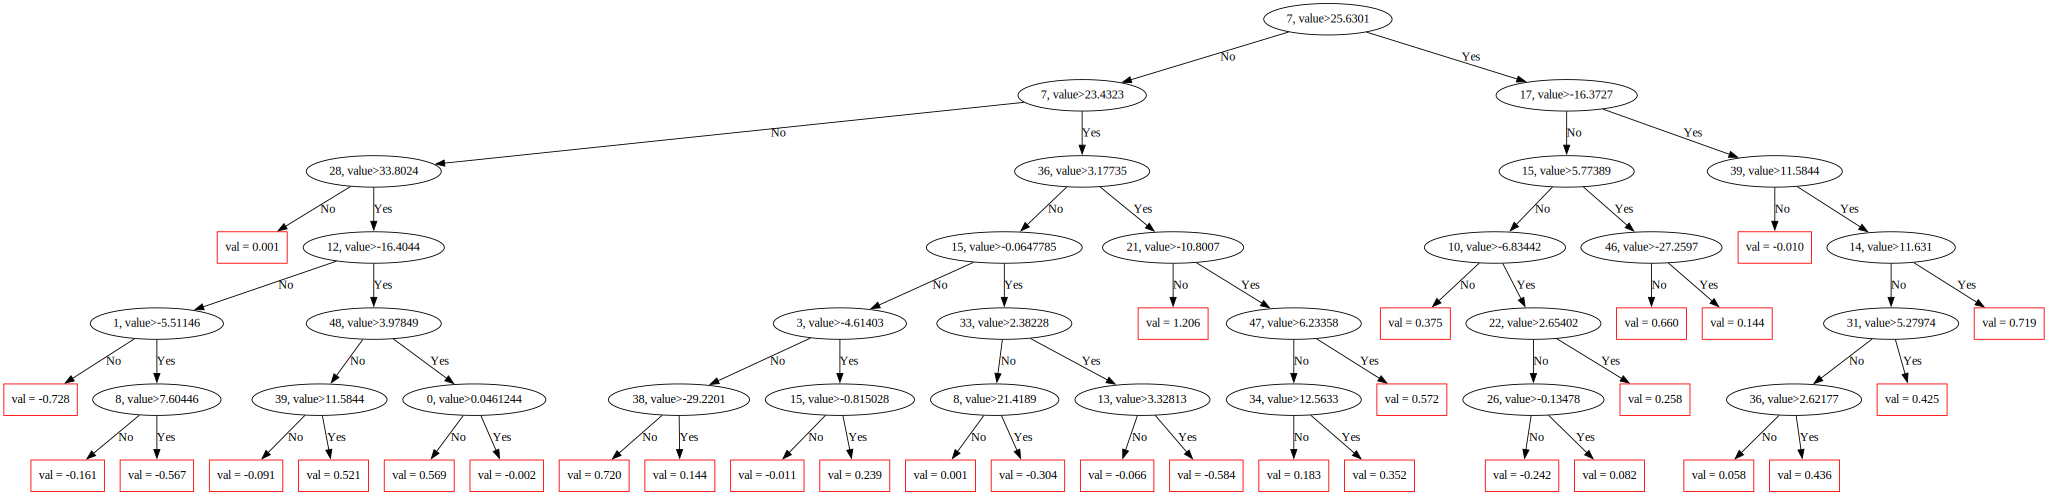

In [24]:
cbc_mean.plot_tree(tree_idx=298)

Text(0.5, 1.0, 'Catboost Feature Importance: Mean')

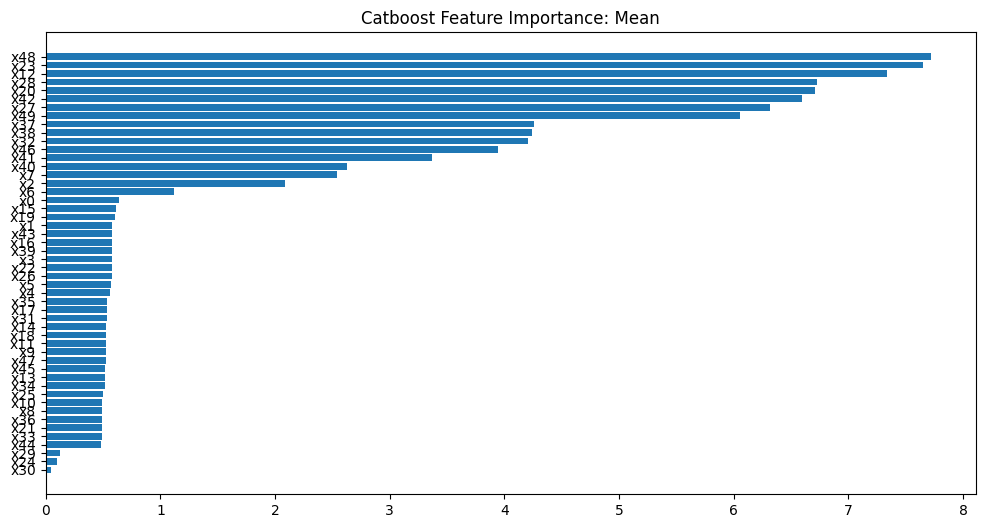

In [25]:
#get feature importance from Catboost model
feature_importance = cbc_mean.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_mean.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Mean')

***
### Median Catboost

In [26]:
df_cat_median = df_median.copy()

In [27]:
target_col = ['y']
feature_cat_cols_median = df_cat_median.loc[:, ~df_cat_median.columns.isin(target_col)].columns
X_cat_median = df_cat_median[feature_cat_cols_median] # Features
y_cat_median = df_cat_median.y # Target variable

In [28]:
X_cat_train_median,X_cat_test_median,y_cat_train_median,y_cat_test_median=train_test_split(X_cat_median,y_cat_median,test_size=0.20,random_state=0)

In [29]:
print('X_cat_delay_train shape: ',X_cat_train_median.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_median.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_median.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_median.shape)

X_cat_delay_train shape:  (128000, 50) 

X_cat_delay_test shape:  (32000, 50) 

y_cat_delay_train shape:  (128000,) 

y_cat_delay_test shape:  (32000,)


In [30]:
cat_feat_median= df_cat_median.select_dtypes(include=['category']).columns.tolist()

In [31]:
%%time
#CatBoost for Is_delay
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          'cat_features':cat_feat_median,
          'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_median = CatBoostClassifier(**params)
cbc_median.fit(X_cat_train_median, y_cat_train_median, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_median, y_cat_test_median), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6095546	test: 0.6109426	best: 0.6109426 (0)	total: 45.7ms	remaining: 45.6s
200:	learn: 0.1433360	test: 0.1852641	best: 0.1851386 (198)	total: 8.59s	remaining: 34.2s
400:	learn: 0.0962551	test: 0.1713178	best: 0.1712082 (397)	total: 16.7s	remaining: 25s
600:	learn: 0.0680497	test: 0.1682982	best: 0.1680503 (579)	total: 24.8s	remaining: 16.4s
800:	learn: 0.0478337	test: 0.1666128	best: 0.1664609 (781)	total: 32.9s	remaining: 8.16s
999:	learn: 0.0339493	test: 0.1656700	best: 0.1653639 (939)	total: 40.5s	remaining: 0us

bestTest = 0.165363931
bestIteration = 939

Shrink model to first 940 iterations.
CPU times: user 3min 11s, sys: 28 s, total: 3min 39s
Wall time: 40.8 s


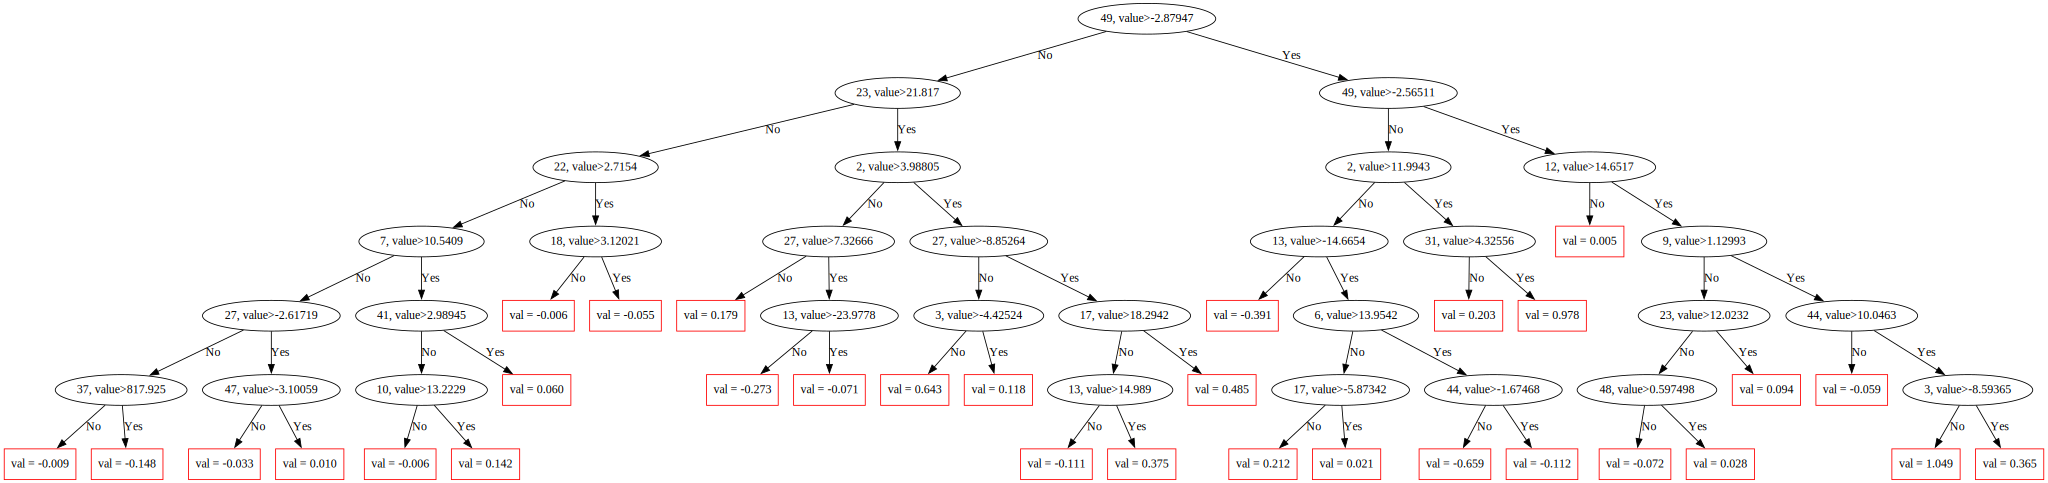

In [32]:
cbc_median.plot_tree(tree_idx=298)

Text(0.5, 1.0, 'Catboost Feature Importance: Median')

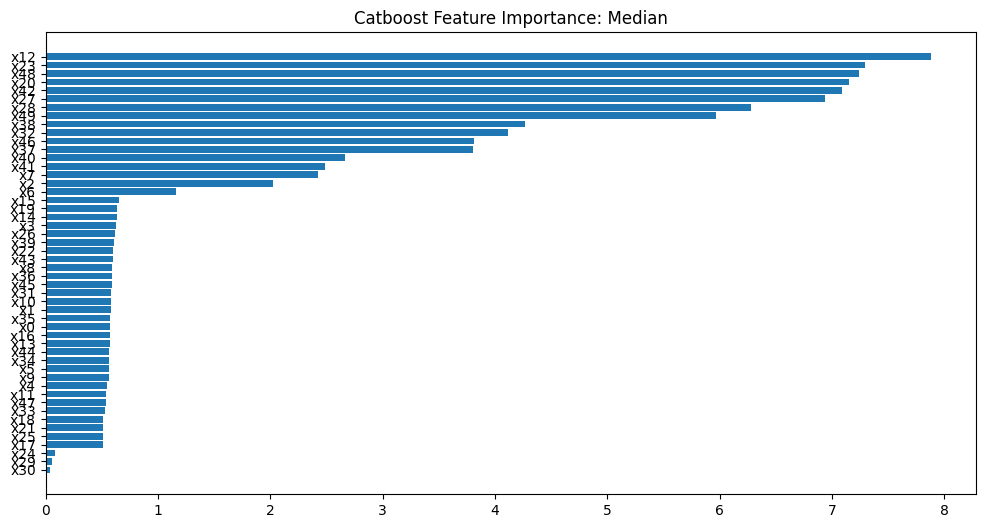

In [33]:
#get feature importance from Catboost model
feature_importance = cbc_median.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_median.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Median')

***
### Mode Catboost

In [34]:
df_cat_mode = df_mode.copy()

In [35]:
target_col = ['y']
feature_cat_cols_mode = df_cat_mode.loc[:, ~df_cat_mode.columns.isin(target_col)].columns
X_cat_mode = df_cat_mean[feature_cat_cols_mode] # Features
y_cat_mode = df_cat_mode.y # Target variable

In [36]:
X_cat_train_mode,X_cat_test_mode,y_cat_train_mode,y_cat_test_mode=train_test_split(X_cat_mode,y_cat_mode,test_size=0.20,random_state=0)

In [37]:
print('X_cat_delay_train shape: ',X_cat_train_mode.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_mode.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_mode.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_mode.shape)

X_cat_delay_train shape:  (128000, 50) 

X_cat_delay_test shape:  (32000, 50) 

y_cat_delay_train shape:  (128000,) 

y_cat_delay_test shape:  (32000,)


In [38]:
cat_feat_mode= df_cat_mode.select_dtypes(include=['category']).columns.tolist()

In [39]:
%%time
#CatBoost for Is_delay
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          'cat_features':cat_feat_mode,
          'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_mode = CatBoostClassifier(**params)
cbc_mode.fit(X_cat_train_mode, y_cat_train_mode, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_mode, y_cat_test_mode), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6095560	test: 0.6109429	best: 0.6109429 (0)	total: 43.2ms	remaining: 43.2s
200:	learn: 0.1437704	test: 0.1844660	best: 0.1843533 (198)	total: 8.65s	remaining: 34.4s
400:	learn: 0.0983508	test: 0.1739432	best: 0.1739164 (399)	total: 16.3s	remaining: 24.4s
600:	learn: 0.0672651	test: 0.1672902	best: 0.1670404 (567)	total: 24s	remaining: 15.9s
800:	learn: 0.0468297	test: 0.1648550	best: 0.1647620 (793)	total: 31.6s	remaining: 7.84s
999:	learn: 0.0336936	test: 0.1656168	best: 0.1646552 (838)	total: 39.5s	remaining: 0us

bestTest = 0.1646551807
bestIteration = 838

Shrink model to first 839 iterations.
CPU times: user 3min 11s, sys: 28 s, total: 3min 39s
Wall time: 39.8 s


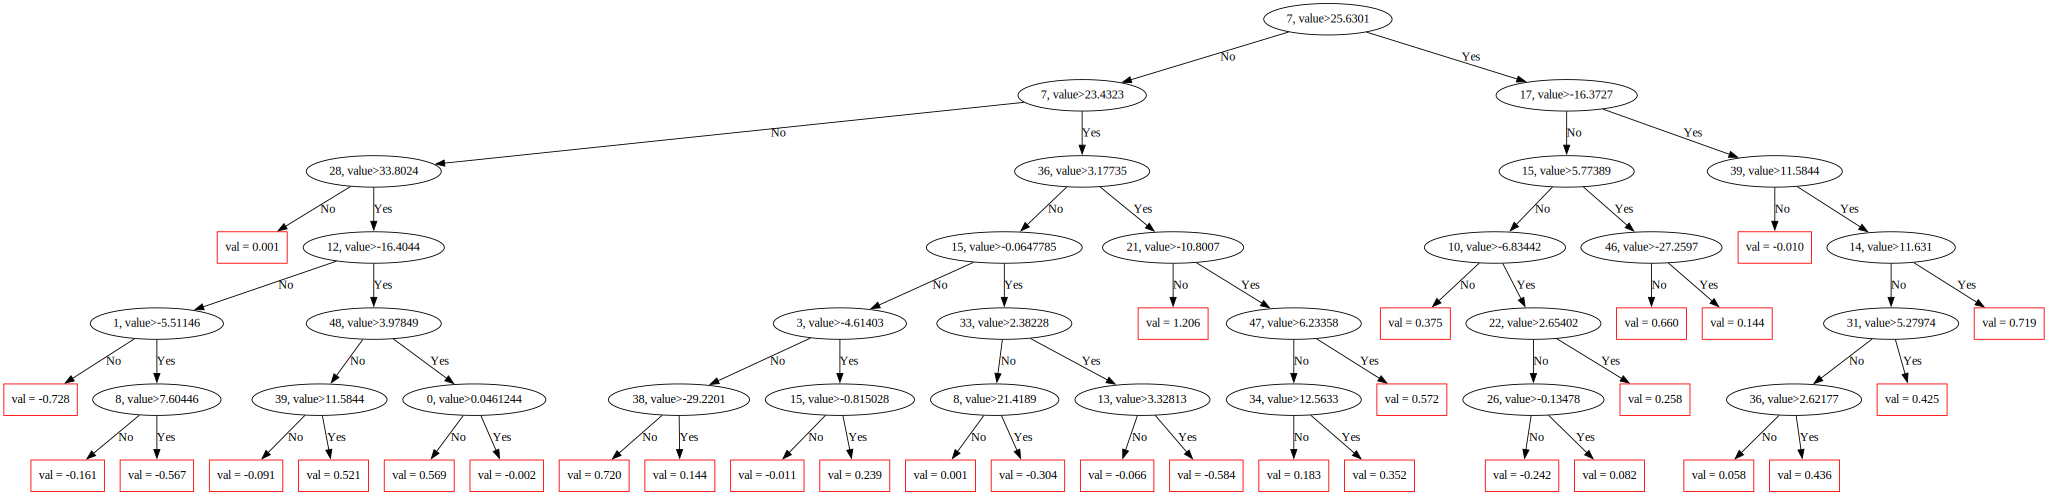

In [40]:
cbc_mode.plot_tree(tree_idx=298)

Text(0.5, 1.0, 'Catboost Feature Importance: Mode')

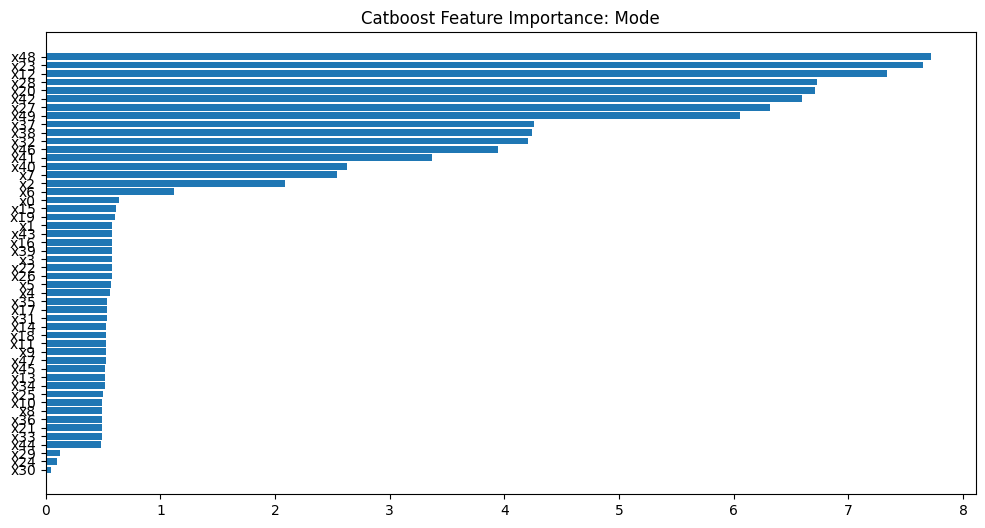

In [41]:
#get feature importance from Catboost model
feature_importance = cbc_mode.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_mode.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Mode')

***
### Drop Catboost

In [42]:
df_cat_drop = df_drop.copy()

In [43]:
target_col = ['y']
feature_cat_cols_drop = df_cat_drop.loc[:, ~df_cat_drop.columns.isin(target_col)].columns
X_cat_drop = df_cat_drop[feature_cat_cols_drop] # Features
y_cat_drop = df_cat_drop.y # Target variable

In [44]:
X_cat_train_drop,X_cat_test_drop,y_cat_train_drop,y_cat_test_drop=train_test_split(X_cat_drop,y_cat_drop,test_size=0.20,random_state=0)

In [45]:
print('X_cat_delay_train shape: ',X_cat_train_drop.shape,'\n')
print('X_cat_delay_test shape: ',X_cat_test_drop.shape,'\n')
print('y_cat_delay_train shape: ',y_cat_train_drop.shape,'\n')
print('y_cat_delay_test shape: ',y_cat_test_drop.shape)

X_cat_delay_train shape:  (126784, 50) 

X_cat_delay_test shape:  (31696, 50) 

y_cat_delay_train shape:  (126784,) 

y_cat_delay_test shape:  (31696,)


In [46]:
cat_feat_drop= df_cat_drop.select_dtypes(include=['category']).columns.tolist()

In [47]:
%%time
#CatBoost for Is_delay
#https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook

seed = 0
params = {'loss_function':'Logloss', # objective function
          'custom_metric':['AUC','Accuracy','F1'], # metrics
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': seed,
          'learning_rate': .25,
          'cat_features':cat_feat_drop,
          'grow_policy': 'Lossguide',
          'thread_count': -1,
          'early_stopping_rounds':200
         }

cbc_drop = CatBoostClassifier(**params)
cbc_drop.fit(X_cat_train_drop, y_cat_train_drop, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_cat_test_drop, y_cat_test_drop), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6034490	test: 0.6032688	best: 0.6032688 (0)	total: 43.5ms	remaining: 43.5s
200:	learn: 0.1387420	test: 0.1789482	best: 0.1786385 (196)	total: 8.69s	remaining: 34.5s
400:	learn: 0.0954655	test: 0.1714791	best: 0.1713615 (385)	total: 16.5s	remaining: 24.6s
600:	learn: 0.0668812	test: 0.1673536	best: 0.1671836 (573)	total: 24s	remaining: 15.9s
800:	learn: 0.0473789	test: 0.1652141	best: 0.1651324 (797)	total: 31.7s	remaining: 7.87s
999:	learn: 0.0335200	test: 0.1646409	best: 0.1642446 (985)	total: 39.5s	remaining: 0us

bestTest = 0.1642445998
bestIteration = 985

Shrink model to first 986 iterations.
CPU times: user 3min 8s, sys: 27.3 s, total: 3min 36s
Wall time: 39.8 s


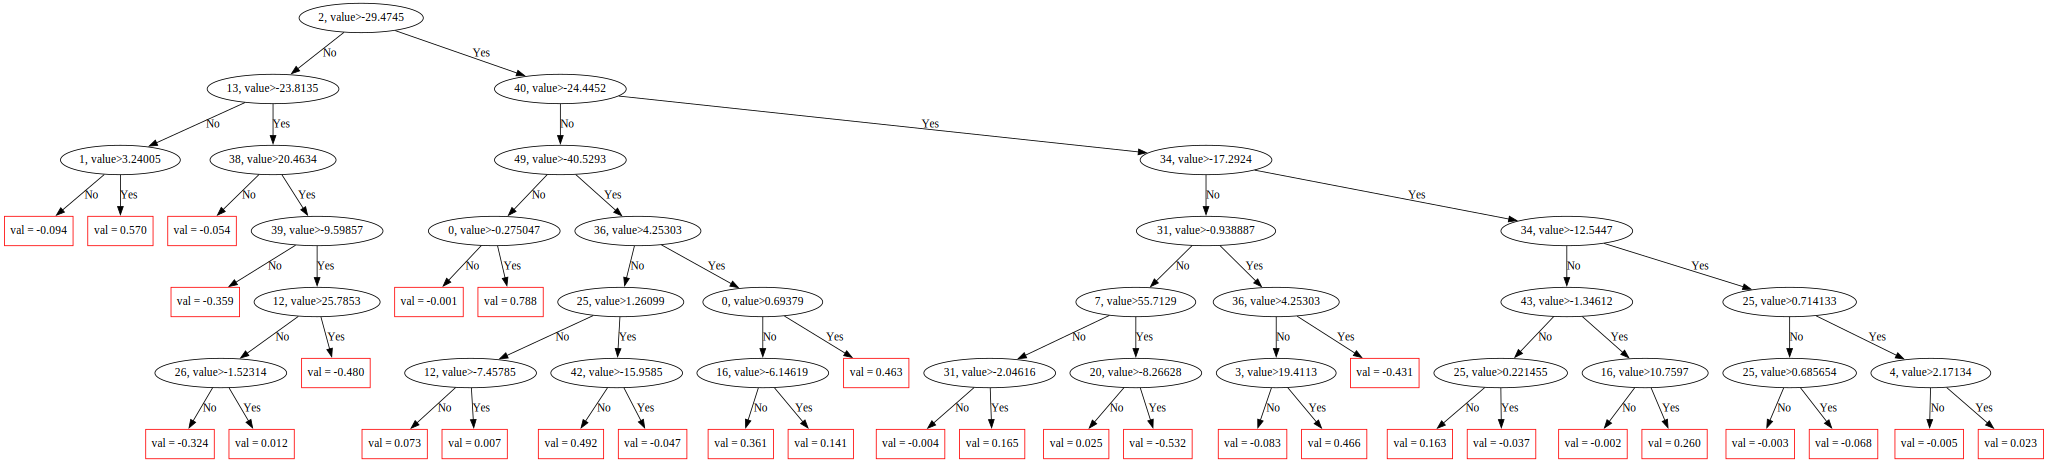

In [48]:
cbc_drop.plot_tree(tree_idx=298)

Text(0.5, 1.0, 'Catboost Feature Importance: Drop')

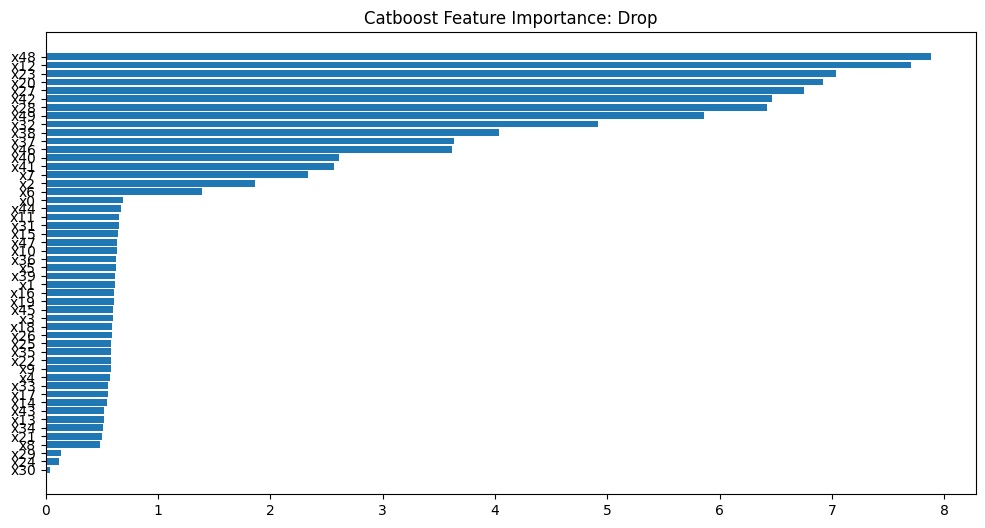

In [49]:
#get feature importance from Catboost model
feature_importance = cbc_drop.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_cat_test_drop.columns)[sorted_idx])
plt.title('Catboost Feature Importance: Drop')